# Problem Set 3

## Problem 1

The e-value problem for longitudinal waves in an elastic rod is:

$$
u'' + k^{2}u = 0, \\
u(0) = 0, \hspace{3mm} u_{x}(l) = 0.
$$

(a) Explain the physical meaning of the second boundary condition.  

(b) Solve the problem analytically to find $k$ and $u$.  

(c) Plot the eigenfunctions that correspond to the lowest three eigenvalues.

### Solution

#### (a)

The meaning of the second boundary condition - derivative of $u$ with respect to $x$ - can be understood, if we "plot" the function $u(x)$. It has to intersect the line $x = l$ normally, meaning that the difference in displacement of any two points at the point $l$ neighborhood tends to zero. In other words, point $l$ will be an antinode of the standing waves (eigenfunctions).

#### (b)

The analytical solution to this problem is as follows.  

1. Write down the characteristic equation and find the general solution:

$$
\lambda ^{2} + k^{2} = 0, \\
\lambda = \pm ik, \hspace{3mm} \Rightarrow \hspace{3mm} u_{g}(x) = C_{1}\cos{(kx)} + C_{2}\sin{(kx)}.
$$

2. Plug $u_{g}$ into boundary conditions:

$$
u(0) = 0, \hspace{3mm} \Rightarrow \hspace{3mm} C_{1} = 0, \\
u'_{l} = 0, \hspace{3mm} \Rightarrow \hspace{3mm} kl = \frac{2n+1}{2} \pi, \\
k = \frac{(2n+1)\pi}{2l}.
$$

3. Write down the final form of the solution:

$$
u(x) = C_{2}\sin{(\frac{(2n+1)\pi}{2l}x)}.
$$

#### (c)

Now we plot the function for the lowest three eigenvalues:

$$
n = (0, 1, 2), \hspace{3mm} 
$$

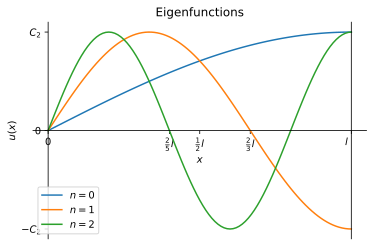

In [2]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy import abc
from sympy import *

C2, pi, n, l, x = abc.symbols('C2, pi, n, l, x')

f = sin((2*n + 1)*pi/(2*l) * x)

ns = np.array([0, 1, 2])

fig, ax = plt.subplots()

for n_ in ns:
    f_ = f.subs({n: n_, l: 1, pi: np.pi})
    func = lambdify(x, f_)

    X = np.arange(0, 1.01, 0.01)
    Y = func(X)

    ax.plot(X, Y)
    plt.xticks([0, 2/5, 0.5, 2/3, 1],
            ('$0$', '$\\frac{2}{5}l$',
            '$\\frac{1}{2}l$', '$\\frac{2}{3}l$',
            '$l\\hspace{1}$')
            )
    plt.yticks([-1, 0, 1], ('$-C_2$', '$0$', '$C_2$'))

ax.set_title('Eigenfunctions')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x)$')
ax.legend(('$n = 0$', '$n = 1$', '$n = 2$'))
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_position(('data', 1))

## Problem 2

Concider elastic waves in a nonuniform rod between $x = 0$ and $x = l$, as in the lecture nodes. The density of the rod varies with space as $\rho = \rho_{0} (1 - \epsilon \frac{x(l-x)}{l^{2}})$, where $\rho_0$ is constant and $\epsilon \ge 0$ is some number. The corresponding eigenvalue problem is:

$$
\phi'' + k_{0}^{2} \left( 1 - \epsilon \frac{x(l-x)}{l^{2}} \right) \phi = 0, \hspace{3mm} \phi(0) = \phi(l) = 0.
$$

Here $k_{0}^{2} = \rho_{0} \omega^{2} l^{2} / c_{0}^{2}$. After rescaling, $x$ with $l$, the equation can be written as 

$$
\phi'' + \lambda^{2}(1 - \epsilon x (1-x))\phi = 0, \hspace{3mm} \phi(0) = \phi(1) = 0,
$$

where $\lambda^{2} = k_{0}^{2}l^{2} = \omega^{2}l^{2}/c_{0}^{2}$.  

Next, the problem is to find the solution at various values of $\epsilon$.  

Note that if $\epsilon = 0$, then we have the analytical solution: $\lambda_{n} = n\pi$ and $\phi_{n} = \sin{(\pi n x)}, n \in \mathbb{N}$.

**(a)** Find the eigenvalues $\lambda^{2}$ numerically using the second derivative approximation

$$
\phi'' \approx (\phi_{i-1} - 2\phi_{i} + \phi_{i+1})/h^{2}
$$

with the grid points $x = x_{i} = ih, i=0, 1, 2, ..., n+1$ and the grid size $h = l/(n+1)$. Take $n$ sufficiently large so that the computed eigenvalues and eigenvectors are accurate. How do you choose that number?  

**(b)** Plot the eigenvectors that correspond to the lowest five eigenvalues at $\epsilon = 0.1$ and on a separate plot show the first ten numerically found eigenvalues $\lambda$. How do they compare with those at $\epsilon = 0$?  

**(c)** How do the eigenvalues and eigenfunctions change when $\epsilon$ increases? Plot $\lambda (\epsilon)$.

### Solution



#### (a)

At first, we need to come up with the matrix form.  

For this, let's plug the approximation into the equation and rearrange the members:

$$
\phi_{i-1} - 2\phi_{i} + \phi_{i+1} + \lambda^{2} h^{2}(1-\epsilon x(1-x))\phi_{i} = 0, \\
\hspace{3mm} \\
\phi_{i-1} - 2\phi_{i} + \phi_{i+1} = \lambda^{2} h^{2} \hat{\rho_{i}} \phi_{i} \\
\hspace{3mm} \\
A\phi = \lambda^{2} K\phi,
$$

where $\hat{\rho_{i}} = (\epsilon x_{i}(1-x_{i}) - 1)$.

To move $K$ to the left, we have to be sure that it is not singular. Since it is a diagonal matrix with elements $h^{2}\hat{\rho_{i}}$, all of it's elemets must be non-zero. Knowing $h^{2}$ is not zero, we get the condition of singularity:

$$
\epsilon x_{i}(1-x_{i}) - 1 = 0,
$$

or

$$
x^{2}_{i} - x_{i} + \frac{1}{\epsilon} = 0, \hspace{3mm} \epsilon \neq 0.
$$

Solving this quadratic equation for $x_{i}$, we get:

$$
x_{i_{1, 2}} = \frac{1}{2} \left( 1 \pm \sqrt{1 - \frac{4}{\epsilon}}\right).
$$

For $x_{i}$ to have real roots, $\epsilon$ must be $\geq 4$. As long as $\epsilon \leq 4$, the matrix $K$ is non-singular and can be moved to the left:

$$
K^{-1}A\phi = \lambda^{2} \phi.
$$

$K$ doesn't depend on $\phi$, thus we can precalculate it and then transfer the inverted matrix $K^{-1}$.

```{warning}
At first, I want to see the general solution with any $\epsilon$ and abstract $h$. By the powers of *SymPy* I will carry $\epsilon$ in the calculations. Due to the computation complexity of eigen**values** (let alone eigen**vectors**), the grid for this step will be chosen extremely sparse Actually, I was not able to get any solution for grids larger that 2 (!) points. Let it be 2 points then.

This is just for pure educational purposes, it serves no practical reason.
```

For matrix $K$, we can write it's diagonal element in terms of our grid as follows:

$$
K^{i}_{i} = h^{2}(\epsilon ih(1-ih)-1)
$$


In [148]:
x0, eps, h = symbols('x0, epsilon, h')

step = 0.5


def create_grid(step):
    X = np.arange(0, 1, step)
    m = len(X)
    return X, m

X, m = create_grid(step)


#computing the matrix K along the grid
def matrix_K(m):
    vec = [h**2*(eps*i*h*(1-(i*h))-1) for i in range(m)]
    K = sp.Matrix.diag(vec)
    return K

K = matrix_K(m)


#building the inverse matrix K^-1
K_inv = K.inv()


#Building the matrix A
def matrix_A(m):
    A = sp.Matrix.diag([-2 for i in range(m)])
    ud = sp.Matrix(np.eye(m, m, 1, dtype=int))
    ld = sp.Matrix(np.eye(m, m, -1, dtype=int))
    A = A + ud + ld
    return A

A = matrix_A(m)


#Building the final matrix B: B{phi} = lambda^2 {phi}
B = K_inv*A

Let's have a look at the matrix $B$:

In [150]:
B

Matrix([
[                                 2/h**2,                                -1/h**2],
[-1/(epsilon*h**4 - epsilon*h**3 + h**2), 2/(epsilon*h**4 - epsilon*h**3 + h**2)]])

Now we can find the eigenvalues with respect to $\epsilon$:

In [151]:
vals = B.eigenvals()
vals_list = list(vals.keys())
vals_vec = sp.Matrix(vals_list)
vals_vec.simplify()
vals_vec

Matrix([
[(epsilon*h**2 - epsilon*h - sqrt(epsilon**2*h**4 - 2*epsilon**2*h**3 + epsilon**2*h**2 + epsilon*h**2 - epsilon*h + 1) + 2)/(h**2*(epsilon*h**2 - epsilon*h + 1))],
[(epsilon*h**2 - epsilon*h + sqrt(epsilon**2*h**4 - 2*epsilon**2*h**3 + epsilon**2*h**2 + epsilon*h**2 - epsilon*h + 1) + 2)/(h**2*(epsilon*h**2 - epsilon*h + 1))]])

```{note}
At this point, there is no point (sorry) for solving the system symbolically. It just takes a large (and unknown) amount of time.
```

Now let us increase the grid density and substitute the $\epsilon$ and $h$ with real values. We'll take $\epsilon = 0.1$ to correspond with the next point of the problem. The grid density was taken large enough to be accurate, but low enough to not brick my laptop for hours.

```{note}
As for more meaningful reasoning for the grid density, we shall account for the approximation method of the second derivative. In this method, we assume that between the points $x_{i-1}$ and $x_{i}$, as well as $x_{i}$ and $x_{i+1}$ the change between 

In [193]:
step = 0.005

X, m = create_grid(step)

K = matrix_K(m)

K_inv = K.inv()

A = matrix_A(m)

B = K_inv*A

#substitution dictionary:

sub = {h: step, eps: 0.1}

B_sub = B.subs(sub)
B_sub[0:3, 0:3]

Matrix([
[          80000.0,          -40000.0,                 0],
[-40019.9099051778,  80039.8198103556, -40019.9099051778],
[                0, -40039.6392428504,  80079.2784857008]])

In [194]:
import scipy as scp
from scipy import sparse
from scipy.sparse import linalg

B_sparse = np.matrix(B_sub)
B_sparse = B_sparse.astype(float)
vals, vecs = linalg.eigs(B_sparse, k=10, sigma=0)

sp.Matrix(vals)


Matrix([
[9.98816227171942],
[39.7938944175406],
[89.4633831983826],
[158.983843331693],
[248.338218124979],
[357.504660920439],
[486.456496708025],
[635.162220479624],
[803.585502722618],
[991.685197549488]])

Here are the 10 lowest eigenvalues $\lambda ^{2}$.

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


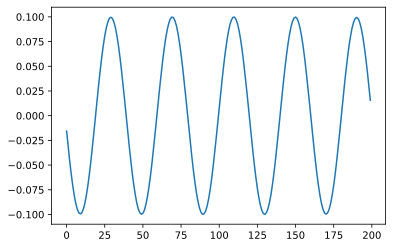

In [200]:
plt.plot(vecs[:, 9])